# AgCl speciation plot

In [1]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-11);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit('notebook'); % does not work
graphics_toolkit("plotly"); % works for XOctave
%graphics_toolkit("gnuplot");% does not work for XOctave. good for Octave
%available_graphics_toolkits()
%loaded_graphics_toolkits()

In [2]:
%equilibrium problem
AgT=0.01; pH=7;  pe=20.75-pH; logClT=-9:0.02:-1; ClT=10.^logClT;

In [3]:
% MODEL USING PHREEQC

for i=1:length(ClT)

minerals=[{'AgCls'}]; totalvector=[AgT; ClT(i); ClT(i)]; totalnames=[{'Ag'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'}; {'Cl-'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'}];
%database=['llnl_nosolubleAgCl.dat']; 
acid=['NaOH']; show=0; T=25;
%database=['AgCl.dat']; 
database=['complexAgCl.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Cl(i)=solutionspeciesconcs(2); 
AgCl(i)=solutionspeciesconcs(3); 
AgCl2(i)=solutionspeciesconcs(4);
AgCl3(i)=solutionspeciesconcs(5);
AgCl4(i)=solutionspeciesconcs(6);
AgCls(i)=solidconcs(1);

end

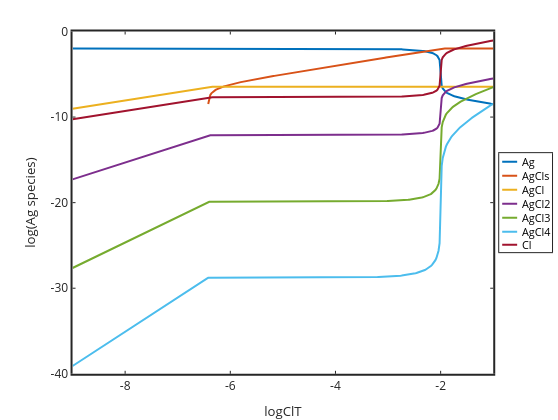

In [4]:
h=plot(logClT,log10(Ag),logClT,log10(AgCls),logClT,log10(AgCl),logClT,log10(AgCl2),logClT,log10(AgCl3),logClT,log10(AgCl4),logClT,log10(Cl));
set(h,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('logClT'); ylabel('log(Ag species)')
legend('Ag','AgCls','AgCl','AgCl2','AgCl3','AgCl4','Cl','location','eastoutside')
axis([-9 -1 -40 0])
%exportforplot=[...
%logClT' log10(Ag)' log10(AgCls)' log10(AgCl)' log10(AgCl2)' log10(AgCl3)' log10(AgCl4)'
%]